
land_th: 0.57 water_th: 0.4 seed: 0 res: (50, 50)


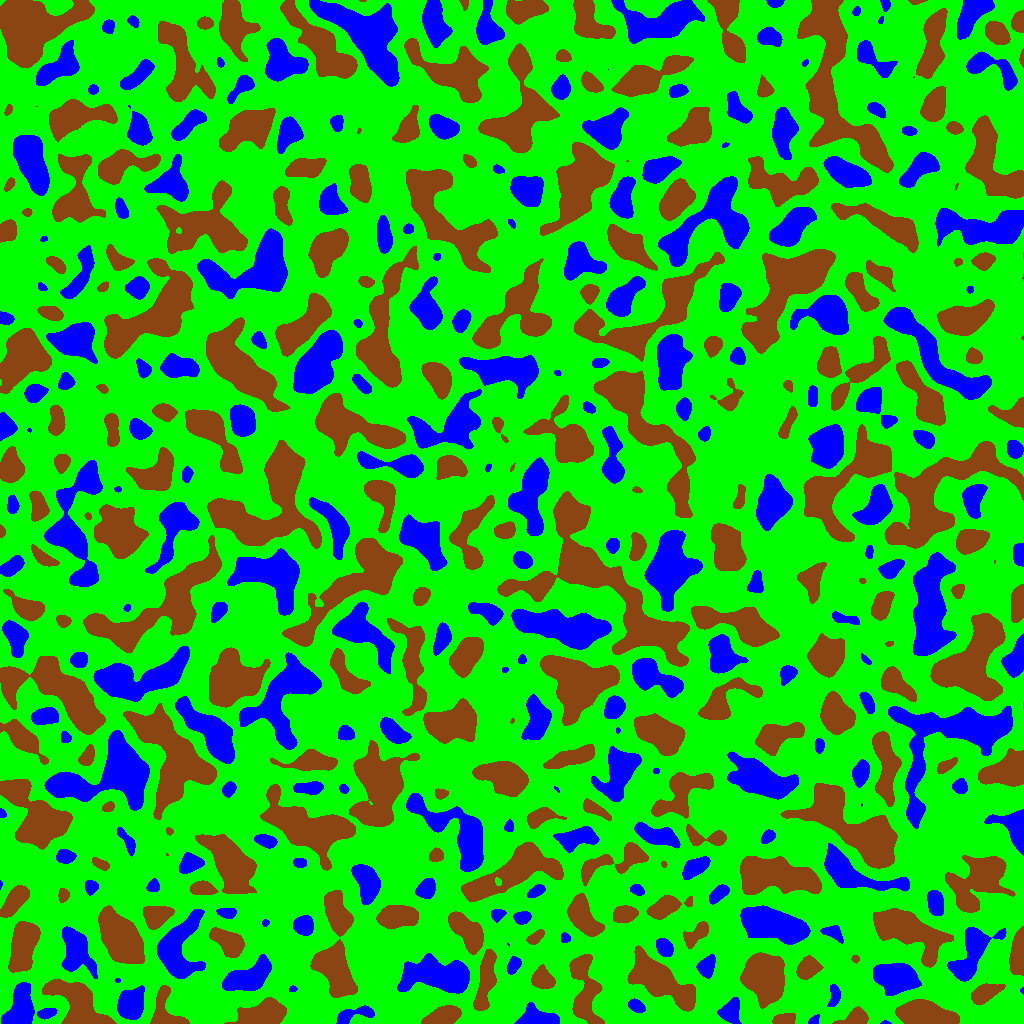


land_th: 0.57 water_th: 0.4 seed: 1 res: (55, 55)


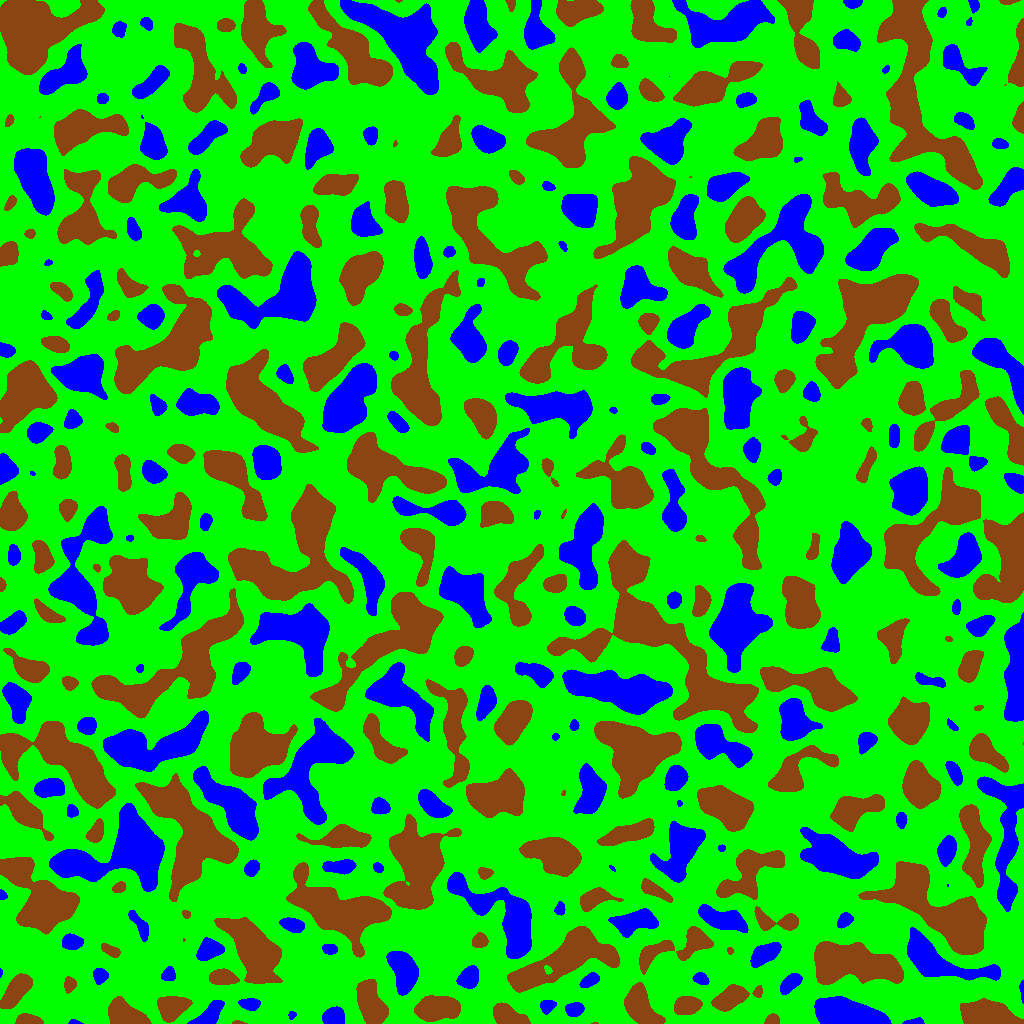


land_th: 0.57 water_th: 0.4 seed: 2 res: (65, 65)


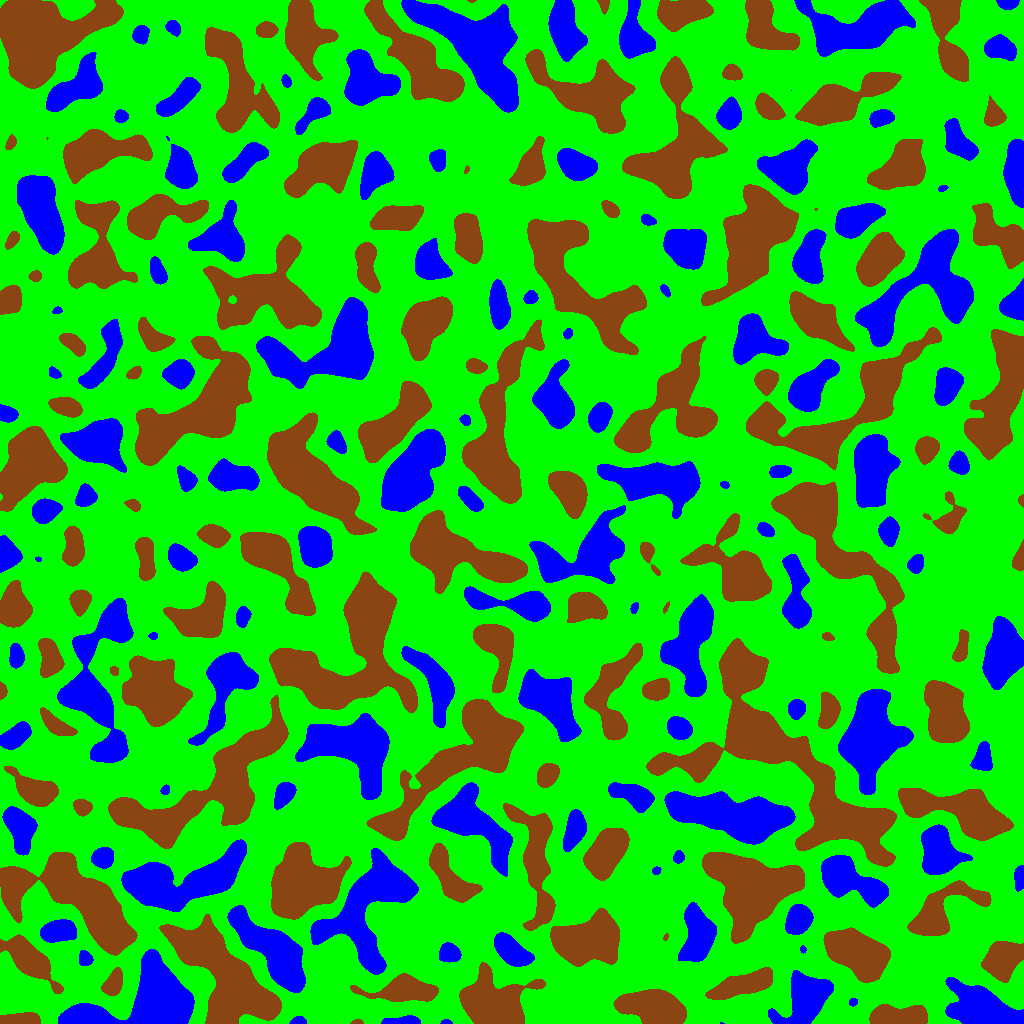


land_th: 0.57 water_th: 0.4 seed: 3 res: (80, 80)


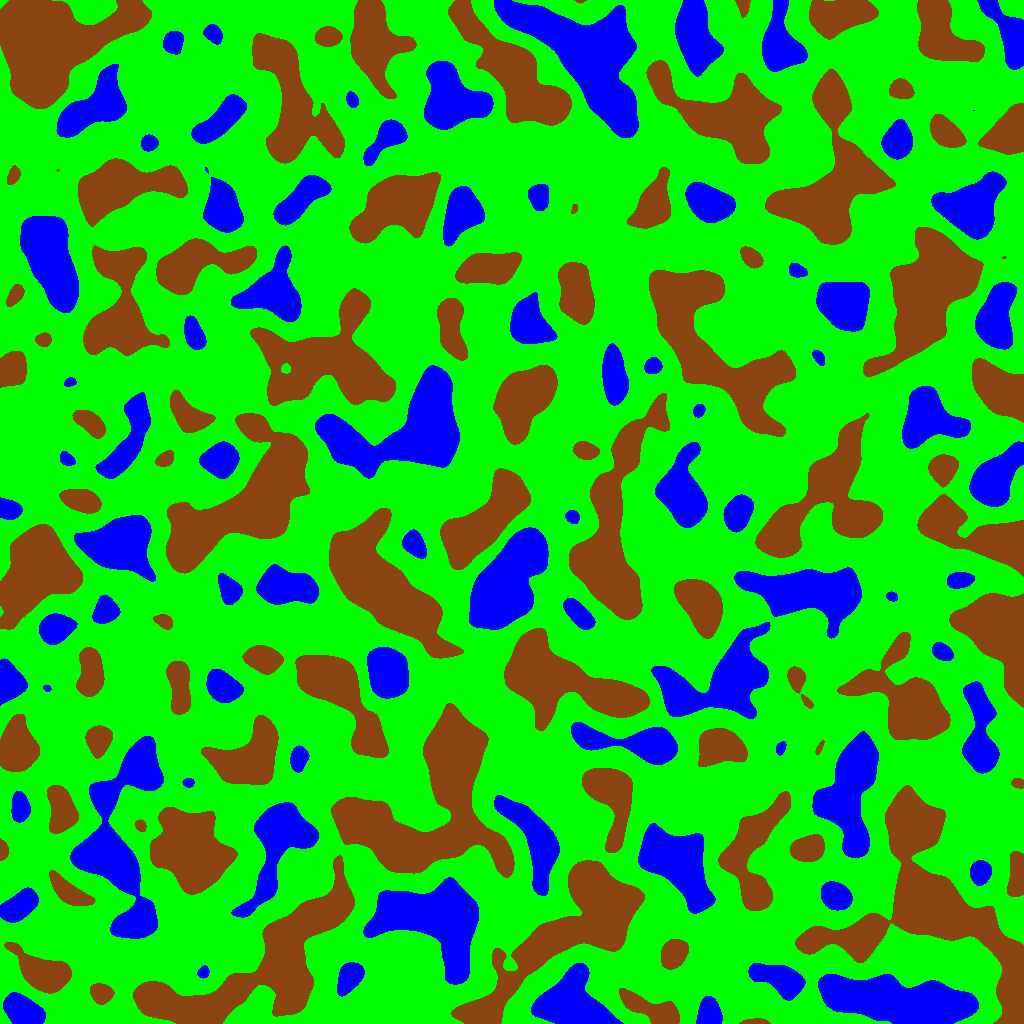


land_th: 0.57 water_th: 0.4 seed: 4 res: (100, 100)


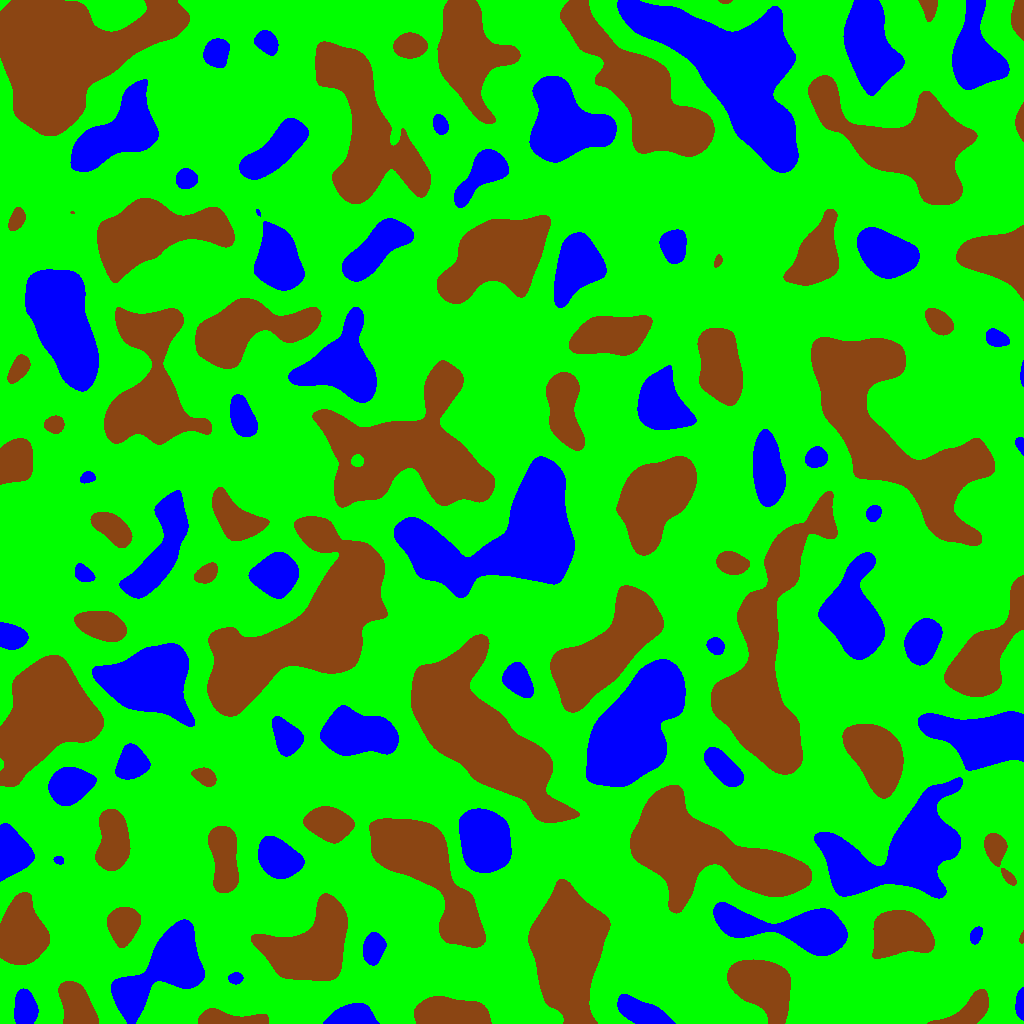


land_th: 0.57 water_th: 0.4 seed: 5 res: (125, 125)


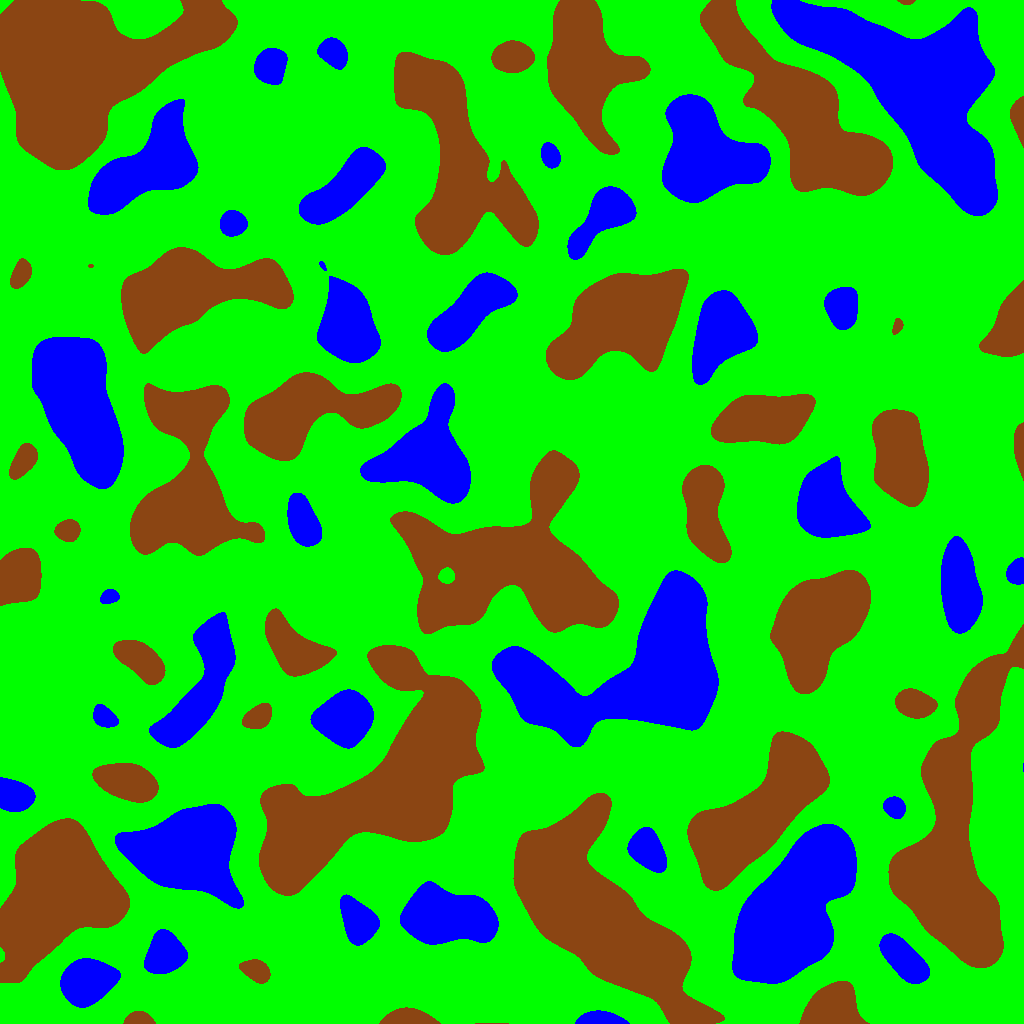


land_th: 0.57 water_th: 0.4 seed: 6 res: (155, 155)


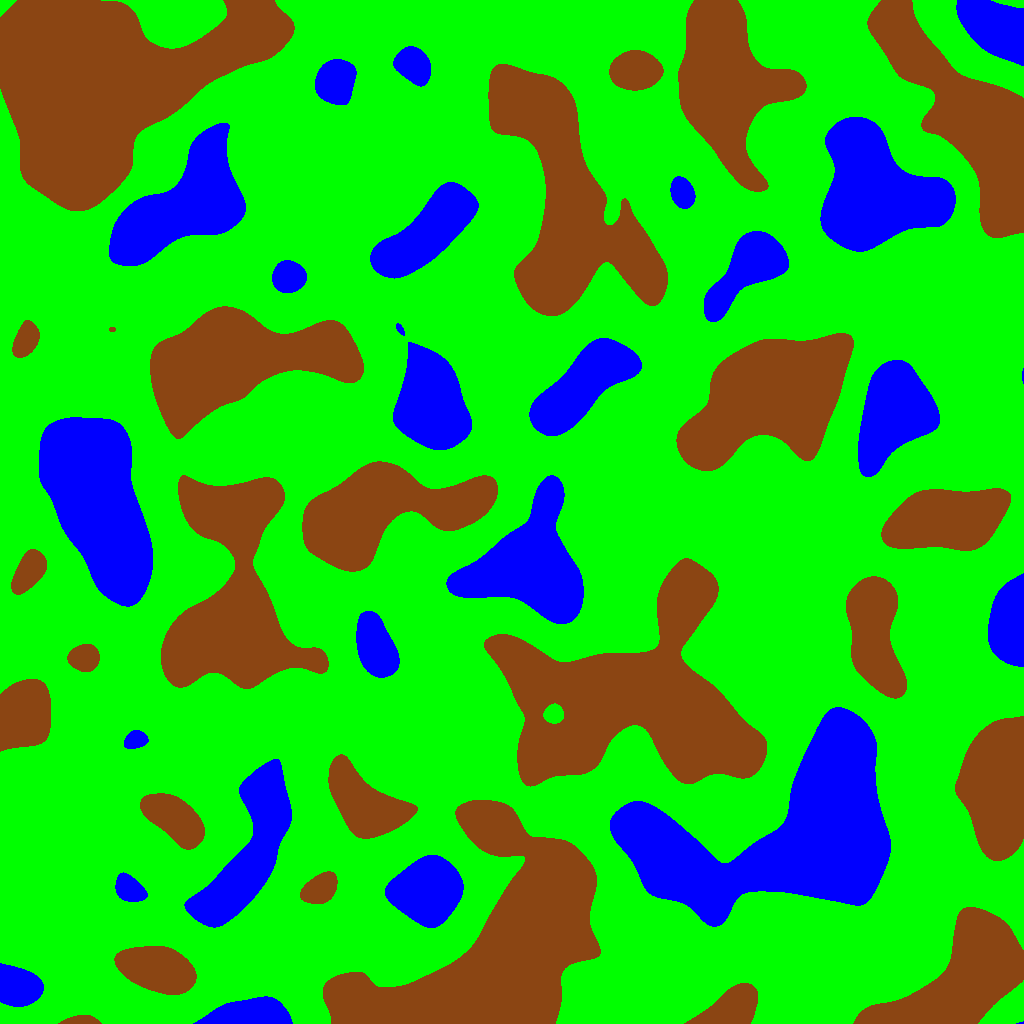


land_th: 0.57 water_th: 0.4 seed: 7 res: (190, 190)


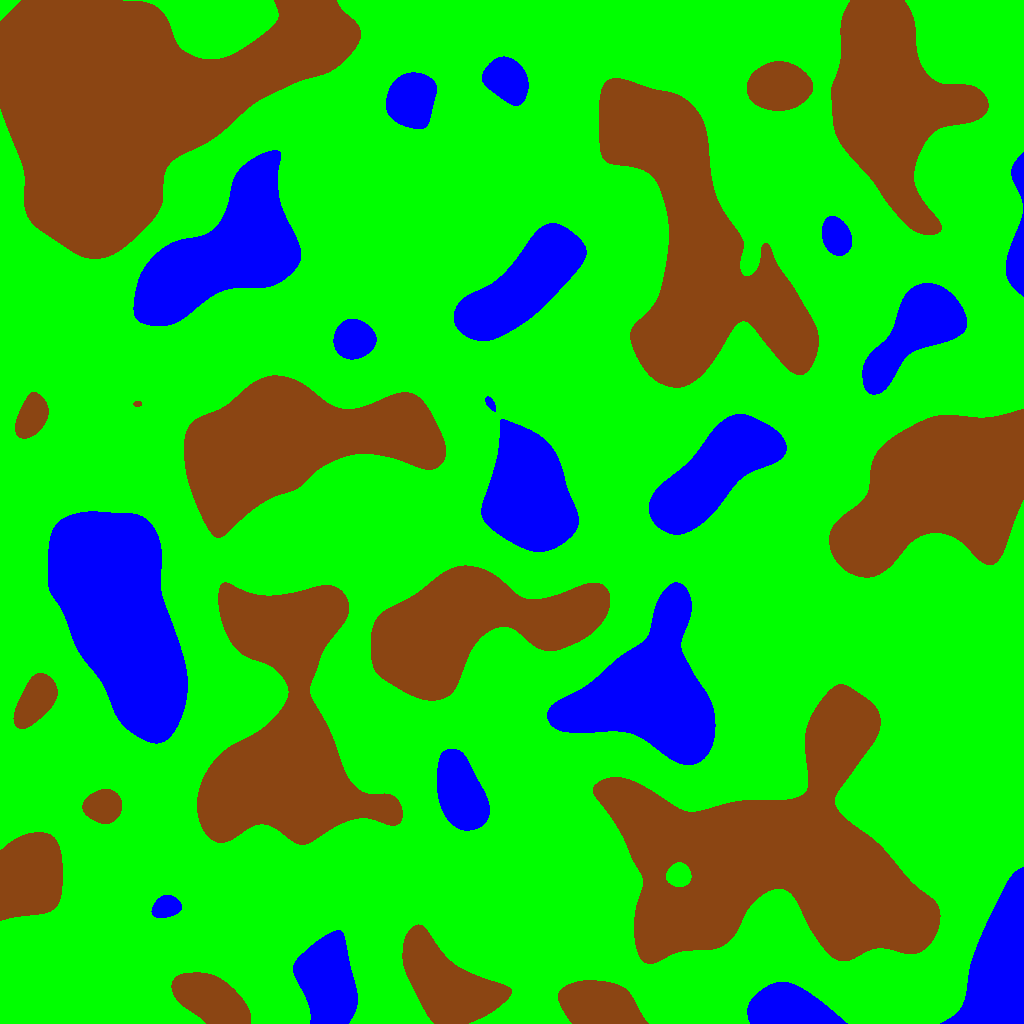


land_th: 0.57 water_th: 0.4 seed: 8 res: (230, 230)


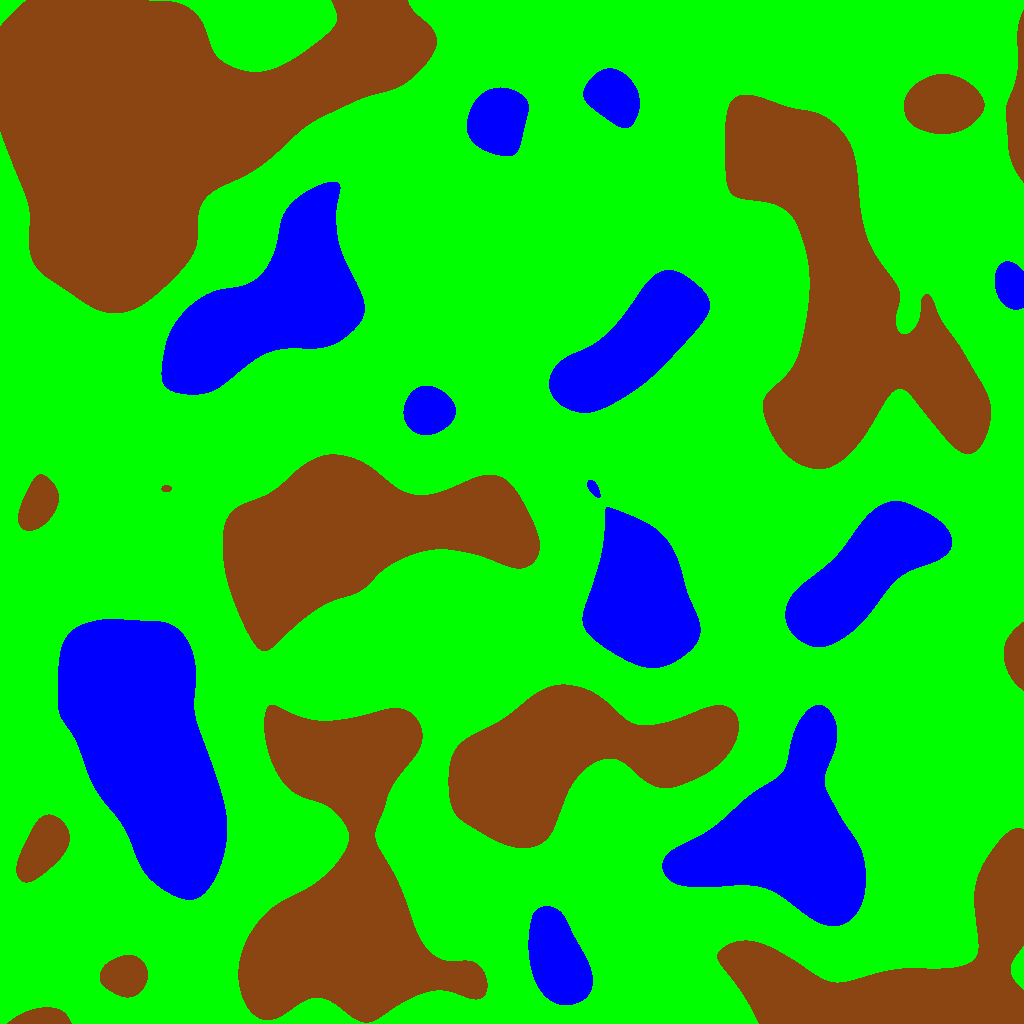


land_th: 0.57 water_th: 0.4 seed: 9 res: (275, 275)


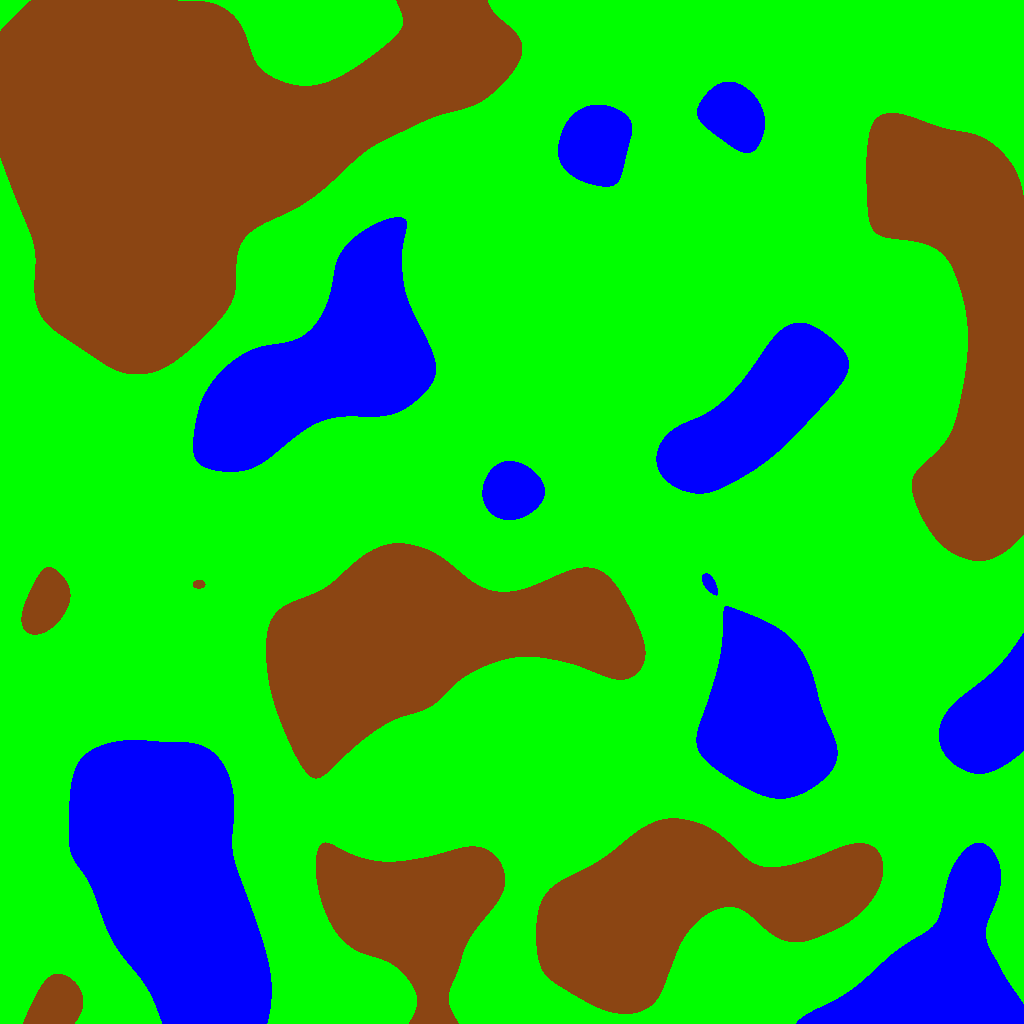

In [47]:
import noise
import numpy as np
from PIL import Image
from IPython.display import display

def generate_perlin_noise_2d(shape, res, seed=None):
    """
    Generates a 2D array filled with Perlin noise values.
    
    Parameters:
    - shape: A tuple containing dimensions (height, width) of the array.
    - res: A tuple specifying the Perlin noise resolutions for (y, x).
    - seed: An optional value to make the noise deterministic.
    
    Returns:
    A 2D array containing Perlin noise values.
    """
    cloud = np.zeros(shape)
    for y in range(shape[0]):
        for x in range(shape[1]):
            p_value = noise.pnoise2(y / res[0], x / res[1], octaves=2, repeatx=1024, repeaty=1024, base=seed if seed else 42)
            cloud[y][x] = (p_value + 1) / 2
    return cloud

def categorize_terrain(world_array, land_th=0.3, water_th=0.7):
    """
    Categorizes the terrain based on Perlin noise values.
    
    Parameters:
    - world_array: 2D array containing Perlin noise values.
    
    Returns:
    A 2D array containing categorized terrain types.
    """
    terrain = np.zeros_like(world_array, dtype=np.object_)

    for y in range(world_array.shape[0]):
        for x in range(world_array.shape[1]):
            if 0 <= world_array[y][x] < water_th:
                terrain[y][x] = 0
            elif water_th <= world_array[y][x] < land_th:
                terrain[y][x] = 1
            else:
                terrain[y][x] = 2

    return terrain

def visualize_terrain(terrain_array):
    """
    Produces an image based on the categorized terrain types.
    
    Parameters:
    - terrain_array: 2D array containing categorized terrain types.
    
    Returns:
    A PIL Image object.
    """
    color_map = {
        0: (0, 0, 255),  # water
        1: (0, 255, 0),  # land
        2: (139, 69, 19)  # mountain
    }

    image_array = np.zeros((terrain_array.shape[0], terrain_array.shape[1], 3), dtype=np.uint8)

    for y in range(terrain_array.shape[0]):
        for x in range(terrain_array.shape[1]):
            image_array[y][x] = color_map[terrain_array[y][x]]

    return Image.fromarray(image_array)

# Testing the functions:
shape = (1024, 1024)
res = (50, 50)

for i in range(10):
    res = (res[0] + i * 5, res[1] + i * 5)
    seed = i
    world = generate_perlin_noise_2d(shape, res, seed=1)
    land_th = 0.57
    water_th = 0.4
    terrain = categorize_terrain(world, land_th, water_th)
    image = visualize_terrain(terrain)
    print("\nland_th:", land_th, "water_th:", water_th, "seed:", i, "res:", res)
    display(image)
#image.save("terrain.png")


In [31]:
world

array([[ 0.00000000e+00, -2.43419825e-04, -1.77316368e-03, ...,
         5.25554307e-02,  5.97759485e-02,  6.51655868e-02],
       [ 2.64141802e-02,  2.61708852e-02,  2.45916098e-02, ...,
         4.23474126e-02,  5.04427068e-02,  5.67726679e-02],
       [ 5.14234342e-02,  5.12311943e-02,  4.96567823e-02, ...,
         3.09154391e-02,  3.98130417e-02,  4.70340252e-02],
       ...,
       [ 2.28541091e-01,  2.32586309e-01,  2.37210348e-01, ...,
        -1.12477548e-01, -8.54799524e-02, -5.46726920e-02],
       [ 2.47509167e-01,  2.52623588e-01,  2.58275300e-01, ...,
        -1.28260046e-01, -1.00625910e-01, -6.90098330e-02],
       [ 2.64131099e-01,  2.70405382e-01,  2.77168185e-01, ...,
        -1.45016626e-01, -1.17003888e-01, -8.48512053e-02]])

In [32]:
terrain

array([['land', 'mountain', 'mountain', ..., 'land', 'land', 'land'],
       ['land', 'land', 'land', ..., 'land', 'land', 'land'],
       ['land', 'land', 'land', ..., 'land', 'land', 'land'],
       ...,
       ['land', 'land', 'land', ..., 'mountain', 'mountain', 'mountain'],
       ['land', 'land', 'land', ..., 'mountain', 'mountain', 'mountain'],
       ['land', 'land', 'land', ..., 'mountain', 'mountain', 'mountain']],
      dtype=object)